In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
import Config
pd.set_option('display.float_format', '{:.3f}'.format)
client = MongoClient(Config.DB_Hostname,Config.DB_Port)

In [2]:
#df=pd.read_csv("2023-10-05_sim_NIFTY.csv")
df = pd.DataFrame(client.Strategy.NIFTY_Guide_Parameters.find({"date":"2023-10-26"})).drop(columns = ['_id'])
#df1=pd.read_csv("2023-10-20_guide_NIFTY.csv")
df1 = pd.DataFrame(client.Strategy.NIFTY_Guide_Parameters.find({"date":"2023-10-27"})).drop(columns = ['_id'])


In [3]:
df[['pos_diff', 'mov_diff', 'prof_diff']].describe()

,pos_diff,mov_diff,prof_diff
count,384.000,384.000,384.000
mean,0.036,0.034,0.028
std,0.031,0.032,0.033
min,0.000,0.000,0.000
25%,0.020,0.020,0.000
50%,0.020,0.040,0.020
75%,0.040,0.040,0.040
max,0.180,0.200,0.220


In [4]:
df1[['pos_diff', 'mov_diff', 'prof_diff']].describe()

,pos_diff,mov_diff,prof_diff
count,384.000,384.000,384.000
mean,0.022,0.044,0.020
std,0.021,0.041,0.020
min,0.000,0.000,0.000
25%,0.000,0.020,0.000
50%,0.020,0.040,0.020
75%,0.020,0.060,0.020
max,0.120,0.320,0.260


In [5]:
pd.Series((np.array(df1.pnl)-np.array(df.pnl))).describe()

count       384.000
mean     -12431.328
std       25481.623
min     -173516.900
25%      -15253.653
50%       -4105.827
75%        1803.235
max       18553.190
dtype: float64

In [6]:
print(round(sum(abs(df.pos_param-df1.pos_param))/384,3))
print(round(sum(abs(df.mov_param-df1.mov_param))/384,3))
print(round(sum(abs(df.prof_param-df1.prof_param))/384,3))

0.034
0.054
0.029


In [7]:
print(sum(df.pos_param-df1.pos_param)/384)
print(sum(df.mov_param-df1.mov_param)/384)
print(sum(df.prof_param-df1.prof_param)/384)

0.0020312499999999953
-0.012239583333333344
0.005312500000000002


In [8]:
pd.set_option('display.max_columns', None)
df.describe()

,strategy_variant,sim_number,pos_param,mov_param,prof_param,strike_offset,sim_vol,drawdown_count,trade_count,capital,pnl,first_drawdown_pnl,second_drawdown_pnl,taylor_sensitivity_1,taylor_sensitivity_2,taylor_sensitivity_3,pos_dev,mov_dev,prof_dev,pos_diff,mov_diff,prof_diff,pmpr_diff,variant_pnl_mean,variant_positive_pnl_mean,variant_negative_pnl_mean,variant_profit_percent,variant_pnl_stdev,variant_positive_pnl_stdev,variant_negative_pnl_stdev,variant_pnl_skew,variant_positive_pnl_skew,variant_negative_pnl_skew,variant_pnl_kurtosis,variant_positive_pnl_kurtosis,variant_negative_pnl_kurtosis,variant_fav_drawdown_percent,variant_ts1_pnl_corr,variant_ts2_pnl_corr,variant_ts3_pnl_corr,variant_ts1_mean,variant_ts2_mean,variant_ts3_mean,variant_ts1_stdev,variant_ts2_stdev,variant_ts3_stdev,variant_pdev_mean,variant_mdev_mean,variant_prdev_mean,variant_pdev_stdev,variant_mdev_stdev,variant_prdev_stdev,variant_pnl_pdiff_corr,variant_pnl_mdiff_corr,variant_pnl_prdiff_corr,variant_pnl_pmprdiff_corr,variant_ts1_pdiff_corr,variant_ts1_mdiff_corr,variant_ts1_prdiff_corr,variant_ts1_pmprdiff_corr,variant_ts2_pdiff_corr,variant_ts2_mdiff_corr,variant_ts2_prdiff_corr,variant_ts2_pmprdiff_corr,variant_ts3_pdiff_corr,variant_ts3_mdiff_corr,variant_ts3_prdiff_corr,variant_ts3_pmprdiff_corr,variant_pdev_pdiff_corr,variant_pdev_mdiff_corr,variant_pdev_prdiff_corr,variant_pdev_pmprdiff_corr,variant_mdev_pdiff_corr,variant_mdev_mdiff_corr,variant_mdev_prdiff_corr,variant_mdev_pmprdiff_corr,variant_prdev_pdiff_corr,variant_prdev_mdiff_corr,variant_prdev_prdiff_corr,variant_prdev_pmprdiff_corr,variant_ts1_pdev_corr,variant_ts1_mdev_corr,variant_ts1_prdev_corr,variant_ts2_pdev_corr,variant_ts2_mdev_corr,variant_ts2_prdev_corr,variant_ts3_pdev_corr,variant_ts3_mdev_corr,variant_ts3_prdev_corr
count,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000
mean,192.500,4939.831,0.165,0.247,0.126,0.100,0.099,0.396,3.375,122033.932,22033.914,11905.740,11905.740,6.533,15.806,87.787,-0.717,-0.857,-0.598,0.036,0.034,0.028,0.033,-24124.636,12309.422,-30633.749,0.217,18850.414,10650.699,13651.164,11242.397,11620.941,3530.856,25807.310,16696.118,17562.127,0.928,0.036,0.020,0.015,-2.322,-11.332,-63.139,75.747,367.398,1972.602,-0.928,-0.814,-1.417,0.306,0.166,0.707,0.019,0.010,-0.266,-0.088,-0.005,0.009,0.007,0.010,-0.005,0.008,0.010,0.011,-0.002,0.006,0.014,0.011,-0.016,0.000,0.000,-0.003,-0.000,0.139,-0.000,0.143,0.000,-0.000,-0.439,-0.168,0.032,0.010,-0.001,0.028,0.011,-0.007,0.024,0.012,-0.007
std,110.995,1941.146,0.065,0.098,0.048,0.000,0.003,0.490,1.297,28050.031,28050.052,33088.987,33088.987,37.705,95.983,681.339,0.685,0.615,0.596,0.031,0.032,0.033,0.019,21883.371,10094.561,23312.169,0.239,13313.852,10237.080,9054.697,17545.221,13058.042,13222.873,17992.840,16178.089,10860.424,0.061,0.109,0.104,0.094,28.849,153.543,856.512,635.753,3408.177,18954.855,0.728,0.652,1.143,0.148,0.085,0.454,0.153,0.112,0.337,0.186,0.057,0.032,0.074,0.042,0.055,0.031,0.075,0.041,0.050,0.031,0.069,0.039,0.388,0.000,0.000,0.093,0.000,0.572,0.000,0.521,0.000,0.000,0.562,0.209,0.075,0.043,0.084,0.073,0.042,0.085,0.063,0.040,0.079
min,1.000,1978.000,0.070,0.100,0.070,0.100,0.097,0.000,1.000,100025.000,24.629,-42107.500,-42107.500,0.209,0.611,2.169,-1.802,-1.710,-2.565,0.000,0.000,0.000,0.000,-80237.100,913.075,-82004.500,0.007,3238.160,1232.7

In [9]:
df1.describe()

,strategy_variant,sim_number,pos_param,mov_param,prof_param,strike_offset,sim_vol,drawdown_count,trade_count,capital,pnl,first_drawdown_pnl,second_drawdown_pnl,taylor_sensitivity_1,taylor_sensitivity_2,taylor_sensitivity_3,pos_dev,mov_dev,prof_dev,pos_diff,mov_diff,prof_diff,pmpr_diff,variant_pnl_mean,variant_positive_pnl_mean,variant_negative_pnl_mean,variant_profit_percent,variant_pnl_stdev,variant_positive_pnl_stdev,variant_negative_pnl_stdev,variant_pnl_skew,variant_positive_pnl_skew,variant_negative_pnl_skew,variant_pnl_kurtosis,variant_positive_pnl_kurtosis,variant_negative_pnl_kurtosis,variant_fav_drawdown_percent,variant_ts1_pnl_corr,variant_ts2_pnl_corr,variant_ts3_pnl_corr,variant_ts1_mean,variant_ts2_mean,variant_ts3_mean,variant_ts1_stdev,variant_ts2_stdev,variant_ts3_stdev,variant_pdev_mean,variant_mdev_mean,variant_prdev_mean,variant_pdev_stdev,variant_mdev_stdev,variant_prdev_stdev,variant_pnl_pdiff_corr,variant_pnl_mdiff_corr,variant_pnl_prdiff_corr,variant_pnl_pmprdiff_corr,variant_ts1_pdiff_corr,variant_ts1_mdiff_corr,variant_ts1_prdiff_corr,variant_ts1_pmprdiff_corr,variant_ts2_pdiff_corr,variant_ts2_mdiff_corr,variant_ts2_prdiff_corr,variant_ts2_pmprdiff_corr,variant_ts3_pdiff_corr,variant_ts3_mdiff_corr,variant_ts3_prdiff_corr,variant_ts3_pmprdiff_corr,variant_pdev_pdiff_corr,variant_pdev_mdiff_corr,variant_pdev_prdiff_corr,variant_pdev_pmprdiff_corr,variant_mdev_pdiff_corr,variant_mdev_mdiff_corr,variant_mdev_prdiff_corr,variant_mdev_pmprdiff_corr,variant_prdev_pdiff_corr,variant_prdev_mdiff_corr,variant_prdev_prdiff_corr,variant_prdev_pmprdiff_corr,variant_ts1_pdev_corr,variant_ts1_mdev_corr,variant_ts1_prdev_corr,variant_ts2_pdev_corr,variant_ts2_mdev_corr,variant_ts2_prdev_corr,variant_ts3_pdev_corr,variant_ts3_mdev_corr,variant_ts3_prdev_corr
count,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000
mean,192.500,4890.565,0.163,0.259,0.121,0.100,0.129,0.068,2.490,109602.583,9602.586,9292.475,9292.475,2.051,5.924,21.486,-0.453,-0.443,-0.072,0.022,0.044,0.020,0.033,-3845.743,4362.599,-7271.694,0.348,5725.373,3559.047,4564.937,1113.813,3637.742,-956.081,8093.482,5094.659,5669.346,0.976,0.030,0.023,0.023,-0.232,-0.395,-0.597,14.436,67.606,338.324,-0.484,-0.420,-0.901,0.187,0.250,0.664,-0.092,0.105,-0.170,0.004,-0.003,0.014,0.007,0.016,-0.002,0.008,0.011,0.013,-0.000,0.010,0.014,0.016,-0.147,0.000,-0.000,-0.046,-0.000,0.343,-0.000,0.316,0.000,0.000,-0.316,-0.138,0.035,0.003,-0.012,0.029,-0.002,-0.015,0.024,0.000,-0.017
std,110.995,1797.629,0.060,0.090,0.049,0.000,0.011,0.252,0.980,6395.021,6395.026,6702.888,6702.888,16.511,47.965,65.610,0.688,0.772,0.511,0.021,0.041,0.020,0.021,6060.155,1834.791,4469.535,0.306,2451.151,1489.003,2311.672,5580.006,1657.249,4179.455,3265.421,1986.279,2725.709,0.018,0.086,0.079,0.074,1.275,4.531,19.866,21.417,101.179,525.092,0.657,0.818,1.173,0.051,0.139,0.333,0.183,0.154,0.272,0.233,0.092,0.036,0.057,0.054,0.087,0.035,0.055,0.054,0.077,0.032,0.057,0.048,0.475,0.000,0.000,0.119,0.000,0.356,0.000,0.332,0.000,0.000,0.643,0.218,0.143,0.040,0.066,0.135,0.041,0.066,0.117,0.036,0.069
min,1.000,1998.000,0.070,0.100,0.070,0.100,0.118,0.000,1.000,100019.000,18.560,-6187.000,-6187.000,0.084,0.082,0.376,-1.720,-1.668,-2.649,0.000,0.000,0.000,0.000,-19525.700,1218.060,-21819.100,0.014,1384.110,1248.810,794.792,-11842.000,-4481.690,-10312.300,

[[1.         0.49723456]
 [0.49723456 1.        ]]


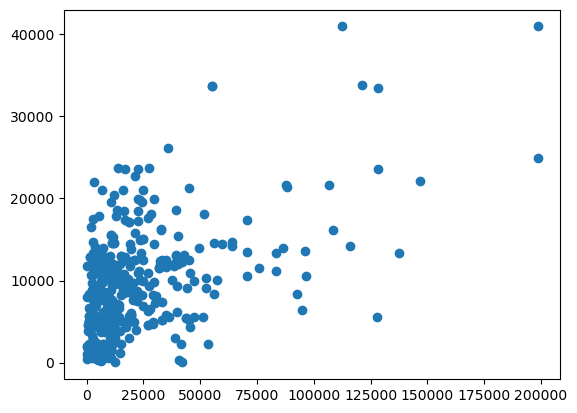

In [10]:
X,Y=df.pnl,df1.pnl
plt.scatter(X,Y)
print(np.corrcoef(X,Y))

Org
Precent Profit 1.0
Expected Profit 22033.914143489586
Expected Loss nan
             pnl  first_drawdown_pnl  second_drawdown_pnl  trade_count  \
count    384.000             384.000              384.000      384.000   
mean   22033.914           11905.740            11905.740        3.375   
std    28050.052           33088.987            33088.987        1.297   
min       24.629          -42107.500           -42107.500        1.000   
25%     6192.208           -9120.283            -9120.283        2.000   
50%    11542.850            8282.130             8282.130        3.000   
75%    26835.300           22363.450            22363.450        4.000   
max   198435.000          198435.000           198435.000        7.000   

       drawdown_count  
count         384.000  
mean            0.396  
std             0.490  
min             0.000  
25%             0.000  
50%             0.000  
75%             1.000  
max             1.000  

New
Precent Profit 1.0
Expected Profit 9

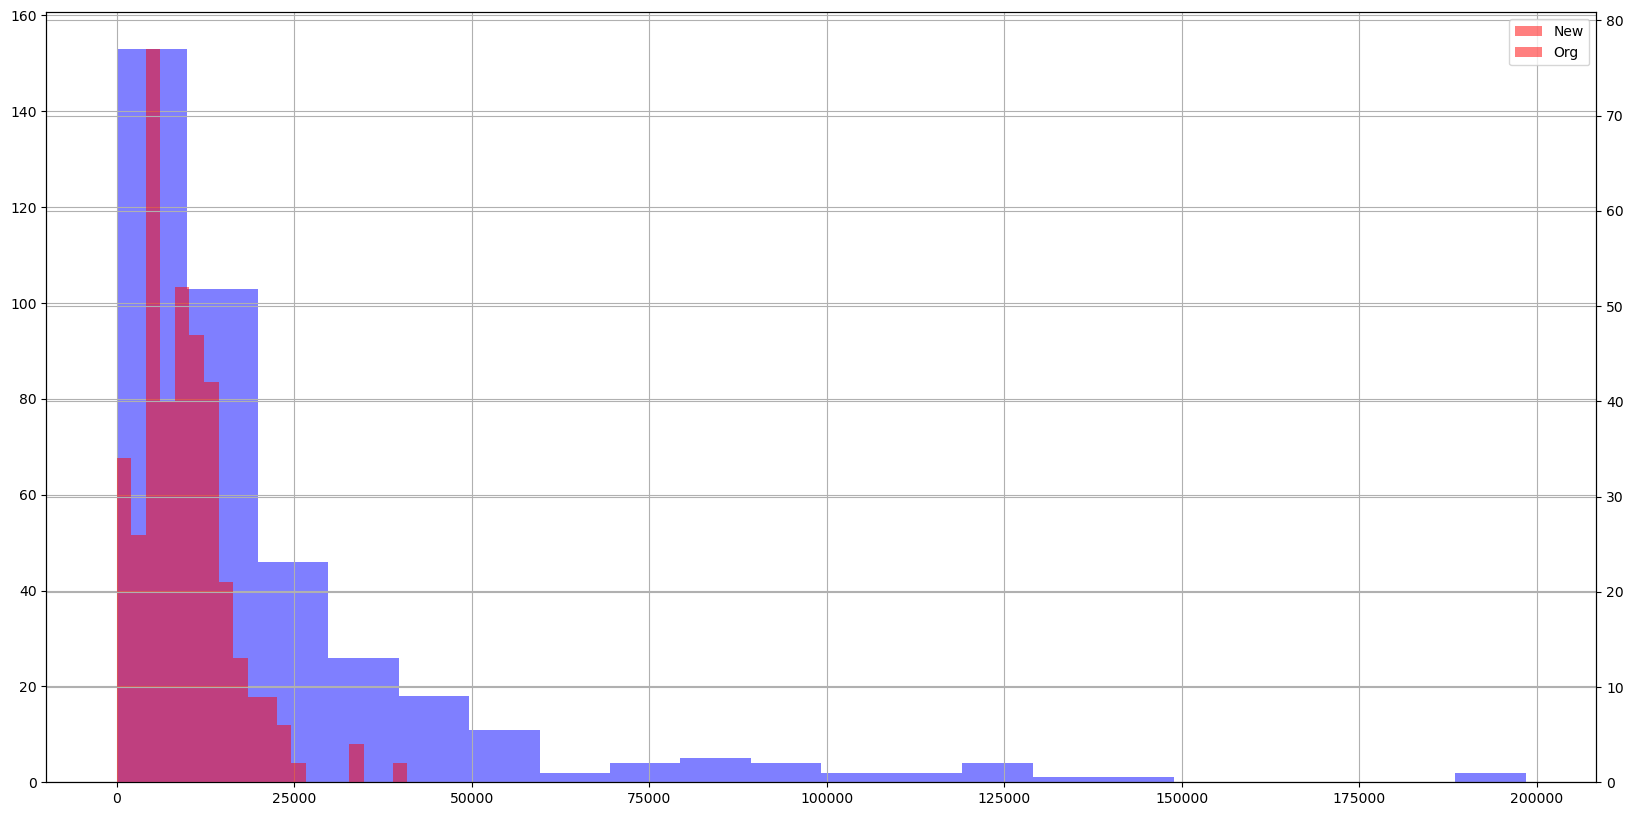

In [11]:
cols=df.underlying.unique().tolist()

for col in cols:
    print("Org")
    temp=df
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    ax=df.pnl.hist(bins=20,figsize=(20,10),label="New",alpha=0.5,color="b")
    ax1=ax.twinx()
    print("\nNew")
    temp=df1
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    df1.pnl.hist(bins=20,figsize=(20,10),label="Org",alpha=0.5,color="r",ax=ax1)    
plt.legend(['New','Org'])

In [113]:
cols=df.p_multiplier_string.unique().tolist()
for col in cols:
    print("\np_multiplier_string: ",col)
    temp=df[df.p_multiplier_string==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'p_multiplier_string'

In [ ]:
cols=df1.p_multiplier_string.unique().tolist()
for col in cols:
    print("\np_multiplier_string: ",col)
    temp=df1[df1.p_multiplier_string==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

In [ ]:
cols=df.m_multiplier_string.unique().tolist()
for col in cols:
    print("\nm_multiplier_string: ",col)
    temp=df[df.m_multiplier_string==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

In [ ]:
cols=df1.m_multiplier_string.unique().tolist()
for col in cols:
    print("\nm_multiplier_string: ",col)
    temp=df1[df1.m_multiplier_string==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

In [ ]:
cols=df.pr_multiplier_string.unique().tolist()
for col in cols:
    print("\npr_multiplier_string: ",col)
    temp=df[df.pr_multiplier_string==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

In [ ]:
cols=df1.pr_multiplier_string.unique().tolist()
for col in cols:
    print("\npr_multiplier_string: ",col)
    temp=df1[df1.pr_multiplier_string==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

In [ ]:
cols=df1.pos_ratio.unique().tolist()
for col in cols:
    print("\npos_ratio: ",col)
    temp=df1[df1.pos_ratio==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()

In [ ]:
cols=df.pos_ratio.unique().tolist()
for col in cols:
    print("\npos_ratio: ",col)
    temp=df[df.pos_ratio==col]
    print("Precent Profit",len(temp[temp.pnl>=0])/len(temp))
    print("Expected Profit",temp[temp.pnl>=0].pnl.mean())
    print("Expected Loss",temp[temp.pnl<0].pnl.mean())
    print(temp[['pnl','first_drawdown_pnl','second_drawdown_pnl','trade_count','drawdown_count']].describe())
    temp.pnl.hist(bins=1000,figsize=(20,10),label=col,alpha=1/len(cols))
plt.legend()